In [1]:
import os

In [2]:
csv_dir = "../data/tabular"

In [3]:
import pandas as pd
from tqdm import tqdm

In [4]:
dados = pd.DataFrame(columns = ['ponto', 'local', 'categoria', 'campanha', 'boletim', 'data', 'nome_ponto', 'cod_regiao', 'cod_ponto', 'cod_monitor'])

In [5]:
for file in tqdm(os.listdir(csv_dir)):
    df_name = f"{csv_dir}/{file}"
    df = pd.read_csv(df_name)
    dados = dados.append(df, ignore_index = True)

100%|██████████| 2196/2196 [00:38<00:00, 56.79it/s]


In [6]:
dados.shape

(48226, 10)

In [7]:
dados.head()

,ponto,local,categoria,campanha,boletim,data,nome_ponto,cod_regiao,cod_ponto,cod_monitor
0,Ipitanga - CCQ PI 100,"Em frente ao Restaurante Beach Stop, na Rua A.",Própria,17161,40/2014,2014-10-03,Ipitanga,CCQ,PI,100
1,Ipitanga - CCQ PI 200,"Rua Vereador José Barbosa, em frente à rotatória.",Própria,17161,40/2014,2014-10-03,Ipitanga,CCQ,PI,200
2,Vilas do Atlântico - CCQ VA 100,Trecho situado entre a Praia de Paquetá e Leblon.,Própria,17161,40/2014,2014-10-03,Vilas do Atlântico,CCQ,VA,100
3,Buraquinho - CCQ BU 100,A cerca de 200 m da foz do Rio Joanes.,Imprópria,17161,40/2014,2014-10-03,Buraquinho,CCQ,BU,100
4,Busca Vida - CCQ BV 100,Em frente à guarita de segurança nº 42 – Lote 42A,Própria,17161,40/2014,2014-10-03,Busca Vida,CCQ,BV,100


In [19]:
dados_ssa_raw = dados[dados["cod_regiao"] == "SSA"]
dados_ssa_raw.shape

(20339, 10)

In [26]:
campanhas_saa_valid = set(dados_ssa_raw.campanha) - set(dados_ssa_raw[dados_ssa_raw["categoria"] == "Indisponível"].campanha)

In [68]:
dados_ssa = dados_ssa_raw[dados_ssa_raw["campanha"].isin(campanhas_saa_valid)].reset_index()
dados_ssa.shape

(16533, 11)

In [62]:
len(set(dados_ssa.data))

476

In [63]:
pd.options.mode.chained_assignment = None 

In [133]:
dados_ssa["target"] = [0 if cat == "Própria" else 1 for cat in dados_ssa.categoria]

In [134]:
dados_ssa

,index,ponto,local,categoria,campanha,boletim,data,nome_ponto,cod_regiao,cod_ponto,cod_monitor,target
0,210,São Tomé de Paripe - SSA IN 100,"Em frente à casa Vila Maria, ao lado da rampa ...",Própria,42061,39/2018,2018-09-28,São Tomé de Paripe,SSA,IN,100,0
1,211,Tubarão - SSA PR 200,"Em frente ao conjunto habitacional abandonado,...",Imprópria,42061,39/2018,2018-09-28,Tubarão,SSA,PR,200,1
2,212,Periperi - SSA PR 100,"Na saída de acesso à praia, após travessia da ...",Imprópria,42061,39/2018,2018-09-28,Periperi,SSA,PR,100,1
3,213,Penha - SSA PE 100,Em frente à barraca do Valença.,Imprópria,42061,39/2018,2018-09-28,Penha,SSA,PE,100,1
4,214,Bogari - SSA BO 100,Em frente ao Colégio da PM (antigo Colégio Joã...,Própria,42061,39/2018,2018-09-28,Bogari,SSA,BO,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16528,48221,Lagoa de Abaete - SSA LA 100,Em frente à placa de fundação do parque.,Própria,48401,33/2019,2019-08-16,Lagoa de Abaete,SSA,LA,100,0
16529,48222,Farol de Itapuã - SSA FI 100,Em frente à Rua da Música (Rua K).,Própria,48401,33/2019,2019-08-16,Farol de Itapuã,SSA,FI,100,0
16530,48223,Stella Mares - SSA ST 100,Em frente ao Hotel Grande Stella Maris.,Imprópria,48401,33/2019,2019-08-16,Stella Mares,SSA,ST,100,1
16531,48224,Flamengo - SSA FL 100,Em frente à barraca Doce Vida.,Própria,48401,33/2019,2019-08-16,Flamengo,SSA,FL,100,0


In [43]:
n_days = len(set(dados_ssa.data))
n_days

476

In [99]:
from datetime import datetime,timedelta

In [117]:
days_order = sorted(list(set(pd.to_datetime(dados_ssa["data"]))))

In [116]:
delta_days = [-1 if x == 0 else (days_order[x]-days_order[x-1]).days for x in range(len(days_order))]

In [113]:
day_index = [days_order.index(x) for x in days_order]

In [112]:
days_string = [x.strftime("%Y-%m-%d") for x in days_order]

In [121]:
index_datas = pd.DataFrame()
index_datas["data"] = days_string
index_datas["data_idx"] = day_index
index_datas["data_delta"] = delta_days
index_datas.head()

,data,data_idx,data_delta
0,2007-02-09,0,-1
1,2007-02-16,1,7
2,2007-10-19,2,245
3,2007-10-26,3,7
4,2007-11-02,4,7


In [ ]:
right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_i

In [135]:
order_dados_ssa = dados_ssa.drop("index", axis=1).\
                    merge(index_datas, how="left", on="data").\
                    sort_values(by="data_idx")

In [136]:
order_dados_ssa.head()

,ponto,local,categoria,campanha,boletim,data,nome_ponto,cod_regiao,cod_ponto,cod_monitor,target,data_idx,data_delta
13202,Placafor - SSA PF 100,Em frente ao posto Salva Vidas.,Própria,11801,05/2007,2007-02-09,Placafor,SSA,PF,100,0,0,-1
13189,Ondina - SSA ON 100,"Próximo à escada de acesso à praia, em frente ...",Própria,11801,05/2007,2007-02-09,Ondina,SSA,ON,100,0,0,-1
13190,Ondina - SSA ON 200,"Próximo ao Morro da Sereia, em frente ao Ed. M...",Própria,11801,05/2007,2007-02-09,Ondina,SSA,ON,200,0,0,-1
13191,Rio Vermelho - SSA RV 100,Em frente à Rua Bartolomeu de Gusmão. próximo ...,Própria,11801,05/2007,2007-02-09,Rio Vermelho,SSA,RV,100,0,0,-1
13192,Rio Vermelho - SSA RV 200,"Próximo à escada de acesso à praia, em frente ...",Própria,11801,05/2007,2007-02-09,Rio Vermelho,SSA,RV,200,0,0,-1


In [137]:
import seaborn as sns

In [138]:
melt_dados_ssa = order_dados_ssa[["ponto", "data_idx", "target"]].\
                    melt(['ponto', "data_idx"], var_name='cols', value_name='vals')

In [139]:
melt_dados_ssa.head()

,ponto,data_idx,cols,vals
0,Placafor - SSA PF 100,0,target,0
1,Ondina - SSA ON 100,0,target,0
2,Ondina - SSA ON 200,0,target,0
3,Rio Vermelho - SSA RV 100,0,target,0
4,Rio Vermelho - SSA RV 200,0,target,0


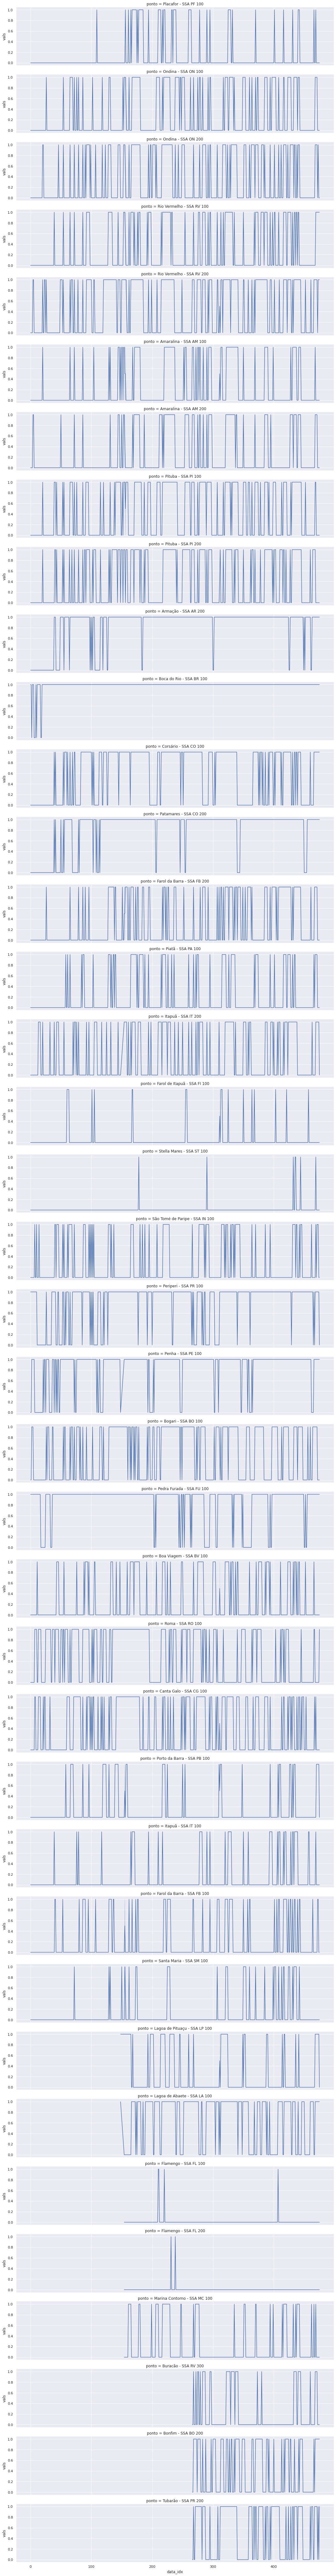

In [149]:
sns.set(rc={'figure.figsize':(100,10)})

hist = sns.FacetGrid(melt_dados_ssa, col='ponto', palette="Set1",
                     col_wrap=1, sharey=True, sharex=True, legend_out=True, aspect = 5)
hist = (hist.map(sns.lineplot, "data_idx", "vals"))

,ponto,local,categoria,campanha,boletim,data,nome_ponto,cod_regiao,cod_ponto,cod_monitor,target,data_idx,data_delta
13202,Placafor - SSA PF 100,Em frente ao posto Salva Vidas.,Própria,11801,05/2007,2007-02-09,Placafor,SSA,PF,100,0,0,-1
13189,Ondina - SSA ON 100,"Próximo à escada de acesso à praia, em frente ...",Própria,11801,05/2007,2007-02-09,Ondina,SSA,ON,100,0,0,-1
13190,Ondina - SSA ON 200,"Próximo ao Morro da Sereia, em frente ao Ed. M...",Própria,11801,05/2007,2007-02-09,Ondina,SSA,ON,200,0,0,-1
13191,Rio Vermelho - SSA RV 100,Em frente à Rua Bartolomeu de Gusmão. próximo ...,Própria,11801,05/2007,2007-02-09,Rio Vermelho,SSA,RV,100,0,0,-1
13192,Rio Vermelho - SSA RV 200,"Próximo à escada de acesso à praia, em frente ...",Própria,11801,05/2007,2007-02-09,Rio Vermelho,SSA,RV,200,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,Pituba - SSA PI 200,"Próximo à rampa de acesso à praia, em frente a...",Própria,54461,52/2020,2020-12-25,Pituba,SSA,PI,200,0,475,14
4521,Pituba - SSA PI 100,"Em frente à escada de acesso à praia, em frent...",Própria,54461,52/2020,2020-12-25,Pituba,SSA,PI,100,0,475,14
4520,Amaralina - SSA AM 200,"Em frente à rua do Balneário, ao Edifício Atlâ...",Própria,54461,52/2020,2020-12-25,Amaralina,SSA,AM,200,0,475,14
4527,Lagoa de Pituaçu - SSA LP 100,Em frente à entrada do estacionamento do parque.,Própria,54461,52/2020,2020-12-25,Lagoa de Pituaçu,SSA,LP,100,0,475,14
